**Домашняя работа №2**

In [1]:
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
data =  pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
data.shape

(506, 14)

In [6]:
data['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

Итак, у нас нет нулевых значений, и нет номинальных качественных переменных. Но есть несколько порядковых качественных переменных - это CHAS (наличие границы с рекой - булево значение) и RAD (индекс доступности радиальных магистралей - 9 видов)

Пока не очень понятно, какие данные нам нужно преобразовать, а какие нам вовсе не понадобятся.
Для начала построим матрицу корреляций

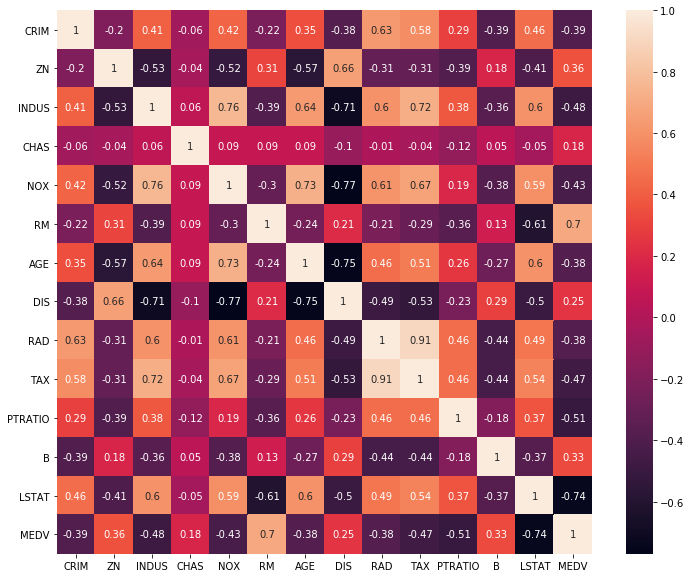

In [7]:
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

Из матрицы видно, что для нашего признака MEDV наименее значимыми оказались CHAS и DIS (т.е. факт близости к реке и расстояния до центров занятости мало влияют на стоимость домов). Возможно, мы сможем убрать эти признаки.

Но прежде взглянем на статистические показатели

In [8]:
data.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Никакие статистические показатели не вызывают подозрения, не указывают на наличие явных выбросов

Попробуем построить линейную модель "как есть", чтобы было потом с чем сравнивать.

In [9]:
data2 = data.drop(['MEDV'], axis=1)

In [10]:
X = data2
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data2)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Bias: 36.459488385090005
Error: 3.270862810900314


Ошибка составляет примерно 3,27 при среднем значении 22.5. Попробуем улучшить это значение

Удалим столбцы CHAS и DIS

In [11]:
data.drop(['CHAS', 'DIS'], axis=1, inplace=True)

Теперь рассмотрим показатель В. Это какой-то коэффициент, выведенный из уровня чернокожего населения по формуле. Вычислим изначальный уровень черноожего населения и посмотрим влияние этого коэффициента на MEDV

In [12]:
data['Bk'] = (data['B']/1000) **0.5 + 0.63
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Bk
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296,15.3,396.90,4.98,24.0,1.260000
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242,17.8,396.90,9.14,21.6,1.260000
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242,17.8,392.83,4.03,34.7,1.256762
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222,18.7,394.63,2.94,33.4,1.258196
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222,18.7,396.90,5.33,36.2,1.260000


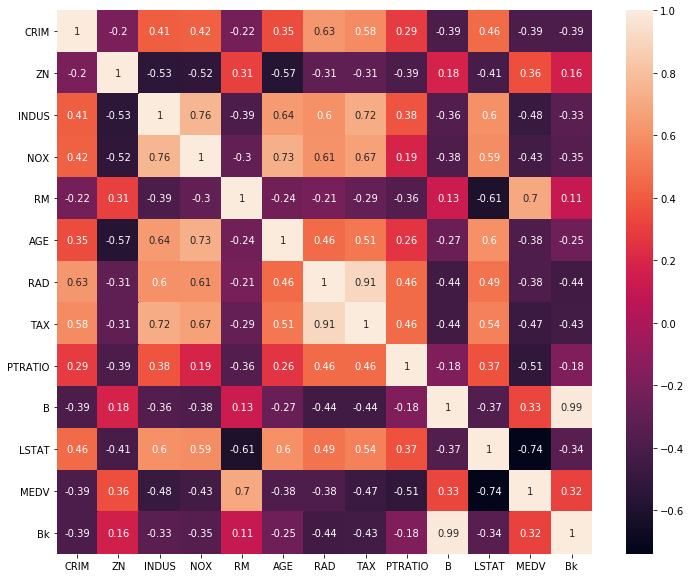

In [13]:
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

Мы видим, что данное преобразование ни к чему не привело - показатель Bk влияет на MEDV еще меньше, чем В

Построим модель без столбцов CHAS и DIS

In [14]:
data.drop(['Bk'], axis=1, inplace=True)

In [15]:
data2 = data.drop(['MEDV'], axis=1)

In [16]:
X = data2
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data2)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-8.47347059e-02  5.90019521e-03  1.37756472e-01 -9.32999804e+00
  4.26781307e+00  3.15270824e-02  3.36984700e-01 -1.43546870e-02
 -1.08362692e+00  1.01970723e-02 -5.49035943e-01]
Bias: 23.380459709510433
Error: 3.4521985181189714


Ошибка стала еще больше. Удаление CHAS и DIS только ухудшило ситуацию.

Заново загрузим датасет:

In [92]:
data =  pd.read_csv(load_boston()['filename'], skiprows=1)

На первоначальной матрице корреляций было видно, что INDUS - доля акров под нерозничный бизнес и DIS - расстояние до пяти бостонских центров занятости - имеют по модулю неплохую корреляцию 0,71. Попробуем взять логарифм от этих величин, что позволит нам использовать их в модели как мультипризнак. 

In [93]:
data['log_DIS'] = np.log(data['DIS'])
data['log_INDUS'] = np.log(data['INDUS'])

In [94]:
data = data.drop(['DIS', 'INDUS'],axis=1)

In [95]:
data2 = data.drop(['MEDV'], axis=1)

In [96]:
X = data2
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data2)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.55318608e-01  2.38763115e-02  2.92117299e+00 -2.32492761e+01
  3.78233860e+00 -1.66955979e-02  3.20512177e-01 -1.26230803e-02
 -8.90738278e-01  8.23782873e-03 -5.20584582e-01 -8.65624204e+00
 -1.12013322e+00]
Bias: 47.77514477234473
Error: 3.222465429754781


Итак, логарифмирование позволило нам незначительно снизить первоначальную ошибку.
На этом пока и остановимся.